Phân tích giỏ thị trường là một trong những kỹ thuật quan trọng được các nhà bán lẻ lớn sử dụng để khám phá mối liên hệ giữa các mặt hàng. Nó hoạt động bằng cách tìm kiếm sự kết hợp của các mục xuất hiện thường xuyên cùng nhau trong các giao dịch. Nói cách khác, nó cho phép các nhà bán lẻ xác định mối quan hệ giữa các mặt hàng mà mọi người mua.

Quy tắc kết hợp được sử dụng rộng rãi để phân tích dữ liệu giao dịch hoặc giỏ hàng bán lẻ và nhằm xác định các quy tắc mạnh được phát hiện trong dữ liệu giao dịch bằng cách sử dụng các thước đo mức độ thú vị, dựa trên khái niệm về quy tắc mạnh.

In [ ]:
# thư viện xử lý làm việc với dữ liệu
import numpy as np
import pandas as pd
# thư viên trực quan hóa dữ liệu
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from wordcloud import WordCloud
# module trong thư viện MLxtend sử dụng cho phân tích luật kết hợp và khai phá dữ liệu
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
from google.colab import drive



In [ ]:

# Kết nối với Google Drive
drive.mount('/content/drive',force_remount=True);

# Đường dẫn đến thư mục chứa tập dữ liệu trên Google Drive
data =pd.read_csv('/content/drive/My Drive/Dataset/Groceries_dataset.csv');

In [ ]:
#kiểm tra số dòng số cột của data
data.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(38765, 3)

Tập dữ liệu có 38765 hàng đơn đặt hàng của mọi người từ các cửa hàng tạp hóa. Các đơn đặt hàng này có thể được phân tích và các quy tắc liên kết có thể được tạo bằng cách sử dụng Phân tích giỏ thị trường bằng các thuật toán như Thuật toán Apriori.

In [ ]:
#lấy ra 10 dòng dữ liệu trong data
data.head(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk
5,4941,14-02-2015,rolls/buns
6,4501,08-05-2015,other vegetables
7,3803,23-12-2015,pot plants
8,2762,20-03-2015,whole milk
9,4119,12-02-2015,tropical fruit


Trực quan hóa một số dữ liệu

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[Text(0.5, 0, 'Date'), Text(0, 0.5, 'Total Number of Items Sold')]

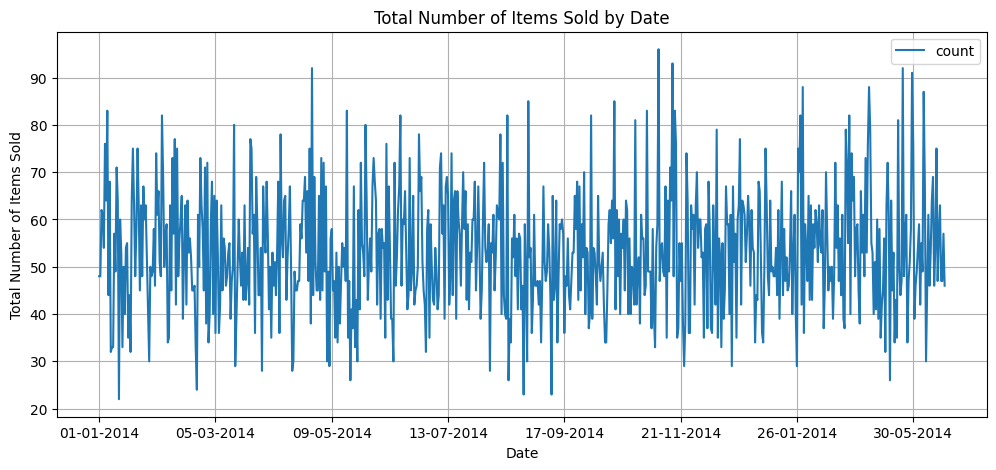

In [ ]:
#vẽ biểu đồ tổng số mặt hàng đã bán theo ngày
data.groupby(['Date'])['itemDescription'].agg(['count']).plot(figsize=(12,5), grid=True, title="Total Number of Items Sold by Date").set(xlabel="Date", ylabel="Total Number of Items Sold")

In [ ]:
#Thiết lập Date để làm chỉ mục
d=data.set_index(['Date'])
#In d ra
d

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Member_number,itemDescription
Date,,
21-07-2015,1808,tropical fruit
05-01-2015,2552,whole milk
19-09-2015,2300,pip fruit
12-12-2015,1187,other vegetables
01-02-2015,3037,whole milk
...,...,...
08-10-2014,4471,sliced cheese
23-02-2014,2022,candy
16-04-2014,1097,cake bar


In [ ]:
#chuyển đổi chỉ mục của DataFrame d thành dạng thời gian
d.index=pd.to_datetime(d.index)

In [ ]:
#tính tổng số lượng mục (items) trong Data
total_items = len(d)
#tính toán tổng số ngày trong dữ liệu
total_days = len(np.unique(d.index.date))
#tính toán tổng số tháng duy nhất trong dữ liệu
total_months = len(np.unique(d.index.month))
#tính toán số lượng trung bình mục bán hàng bán được mỗi ngày
average_items = total_items / total_days
#tính toán số lượng mục bán hàng duy nhất trong Data
unique_items = d.itemDescription.unique().size

print("There are {} unique items sold ".format(unique_items))
print("Total {} items sold in {} days throughout {} months".format(total_items, total_days, total_months))
print("With an average of {} items sold daily".format(average_items))

There are 167 unique items sold 
Total 38765 items sold in 728 days throughout 12 months
With an average of 53.24862637362637 items sold daily


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[Text(0.5, 0, 'Date'), Text(0, 0.5, 'Total Number of Items Sold')]

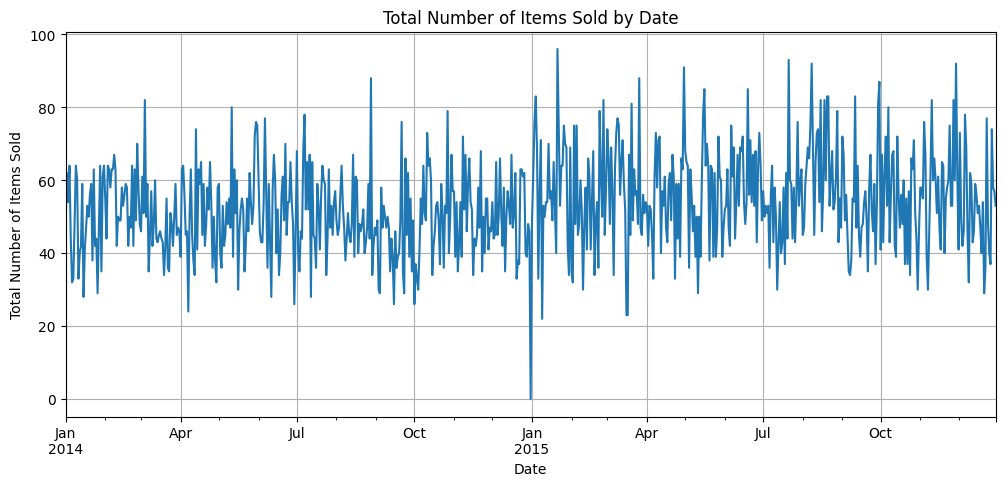

In [ ]:
#vẽ biểu đồ tổng số mặt hàng đã bán theo ngày
d.resample("D")['itemDescription'].count().plot(figsize=(12,5), grid=True, title="Total Number of Items Sold by Date").set(xlabel="Date", ylabel="Total Number of Items Sold")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[Text(0.5, 0, 'Date'), Text(0, 0.5, 'Total Number of Items Sold')]

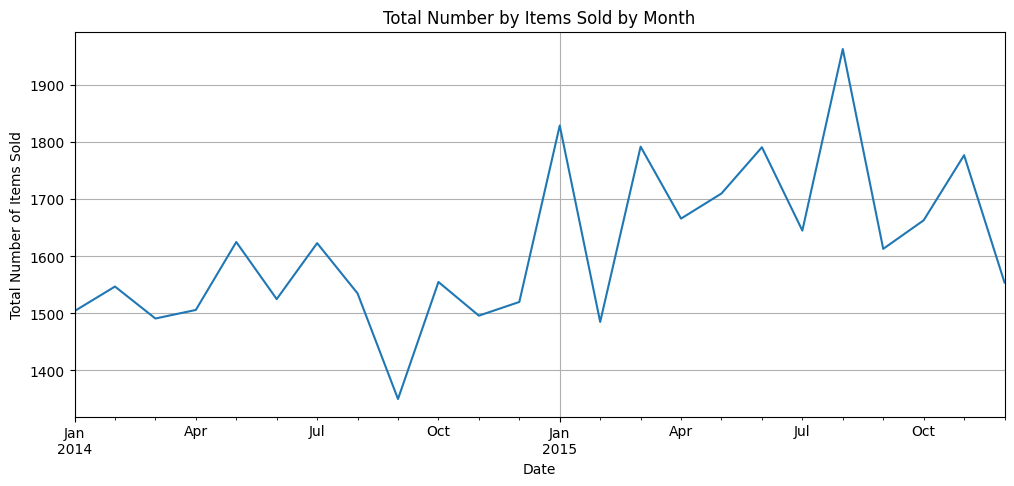

In [ ]:
#vẽ biểu đồ tổng số mặt hàng đã bán theo tháng
d.resample("M")['itemDescription'].count().plot(figsize=(12,5), grid=True, title="Total Number by Items Sold by Month").set(xlabel="Date", ylabel="Total Number of Items Sold")

In [ ]:
#Tạo cột mới Hour
d["Hour"] = d.index.hour
#Tạo cột mới Weekday
d["Weekday"] = d.index.weekday + 1

d.head(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Member_number,itemDescription,Hour,Weekday
Date,,,,
2015-07-21,1808,tropical fruit,0,2
2015-05-01,2552,whole milk,0,5
2015-09-19,2300,pip fruit,0,6
2015-12-12,1187,other vegetables,0,6
2015-01-02,3037,whole milk,0,5
2015-02-14,4941,rolls/buns,0,6
2015-08-05,4501,other vegetables,0,3
2015-12-23,3803,pot plants,0,3
2015-03-20,2762,whole milk,0,5


In [ ]:
#đếm số lần xuất hiện của mỗi giá trị trong cột itemDescription
data['itemDescription'].value_counts()



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


whole milk               2502
other vegetables         1898
rolls/buns               1716
soda                     1514
yogurt                   1334
                         ... 
rubbing alcohol             5
bags                        4
baby cosmetics              3
kitchen utensil             1
preservation products       1
Name: itemDescription, Length: 167, dtype: int64

In [ ]:
#Lấy số lượng giá trị của cột Date
data['Date'].nunique()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


728

In [ ]:
# Tạo biểu đồ thể hiện số lần xuất hiện của từng mặt hàng (item) trong cột itemDescription
def bar_plot(df,col):

    fig = px.bar(df,
        x = df[col].value_counts().keys(),
        y = df[col].value_counts().values,
        color= df[col].value_counts().keys()
    )
    fig.update_layout(
    xaxis_title= col,
    yaxis_title="Count",
    legend_title=col,
    font_family="Courier New",
    font_color="blue",
    title_font_family="Times New Roman",
    title_font_color="red",
    legend_title_font_color="green"
)

    fig.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
bar_plot(data,'itemDescription')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
#nhóm dữ liệu
df=data.groupby(['Member_number','Date'])['itemDescription'].apply(sum)
df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Member_number  Date      
1000           15-03-2015           sausagewhole milksemi-finished breadyogurt
               24-06-2014                          whole milkpastrysalty snack
               24-07-2015                           canned beermisc. beverages
               25-11-2015                              sausagehygiene articles
               27-05-2015                               sodapickled vegetables
                                                   ...                        
4999           24-01-2015    tropical fruitberriesother vegetablesyogurtkit...
               26-12-2015                                   bottled waterherbs
5000           09-03-2014                          fruit/vegetable juiceonions
               10-02-2015               sodaroot vegetablessemi-finished bread
               16-11-2014                         bottled beerother vegetables
Name: itemDescription, Length: 14963, dtype: object

In [ ]:
#lấy dữ liệu của df
df.values


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array(['sausagewhole milksemi-finished breadyogurt',
       'whole milkpastrysalty snack', 'canned beermisc. beverages', ...,
       'fruit/vegetable juiceonions',
       'sodaroot vegetablessemi-finished bread',
       'bottled beerother vegetables'], dtype=object)

In [ ]:
pd.set_option('display.max_colwidth', -1)

In [ ]:
#tạo danh sách các giao dịch
transactions = [a[1]['itemDescription'].tolist() for a in list(data.groupby(['Member_number','Date']))]
transactions

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



[['sausage', 'whole milk', 'semi-finished bread', 'yogurt'],
 ['whole milk', 'pastry', 'salty snack'],
 ['canned beer', 'misc. beverages'],
 ['sausage', 'hygiene articles'],
 ['soda', 'pickled vegetables'],
 ['frankfurter', 'curd'],
 ['sausage', 'whole milk', 'rolls/buns'],
 ['whole milk', 'soda'],
 ['beef', 'white bread'],
 ['frankfurter', 'soda', 'whipped/sour cream'],
 ['frozen vegetables', 'other vegetables'],
 ['butter', 'whole milk'],
 ['tropical fruit', 'sugar'],
 ['butter milk', 'specialty chocolate'],
 ['sausage', 'rolls/buns'],
 ['root vegetables', 'detergent'],
 ['frozen meals', 'dental care'],
 ['rolls/buns', 'rolls/buns'],
 ['dish cleaner', 'cling film/bags'],
 ['canned beer', 'frozen fish'],
 ['other vegetables', 'hygiene articles'],
 ['pip fruit', 'whole milk', 'tropical fruit'],
 ['rolls/buns', 'red/blush wine', 'chocolate'],
 ['other vegetables', 'shopping bags'],
 ['whole milk', 'chocolate', 'packaged fruit/vegetables', 'rolls/buns'],
 ['root vegetables', 'whole milk'

In [ ]:
#biến đổi danh sách các giao dịch thành một ma trận nhị phân
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
#In kết quả
te.columns_

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



['Instant food products',
 'UHT-milk',
 'abrasive cleaner',
 'artif. sweetener',
 'baby cosmetics',
 'bags',
 'baking powder',
 'bathroom cleaner',
 'beef',
 'berries',
 'beverages',
 'bottled beer',
 'bottled water',
 'brandy',
 'brown bread',
 'butter',
 'butter milk',
 'cake bar',
 'candles',
 'candy',
 'canned beer',
 'canned fish',
 'canned fruit',
 'canned vegetables',
 'cat food',
 'cereals',
 'chewing gum',
 'chicken',
 'chocolate',
 'chocolate marshmallow',
 'citrus fruit',
 'cleaner',
 'cling film/bags',
 'cocoa drinks',
 'coffee',
 'condensed milk',
 'cooking chocolate',
 'cookware',
 'cream',
 'cream cheese ',
 'curd',
 'curd cheese',
 'decalcifier',
 'dental care',
 'dessert',
 'detergent',
 'dish cleaner',
 'dishes',
 'dog food',
 'domestic eggs',
 'female sanitary products',
 'finished products',
 'fish',
 'flour',
 'flower (seeds)',
 'flower soil/fertilizer',
 'frankfurter',
 'frozen chicken',
 'frozen dessert',
 'frozen fish',
 'frozen fruits',
 'frozen meals',
 'froze

In [ ]:
te_ary

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



array([[False, False, False, ...,  True,  True, False],
       [False, False, False, ...,  True, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [ ]:
#tạo một DataFrame mới và tính toán thống kê mô tả cho các cột
transactions = pd.DataFrame(te_ary, columns=te.columns_)
pf = transactions.describe()
pf

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
count,14963,14963,14963,14963,14963,14963,14963,14963,14963,14963,...,14963,14963,14963,14963,14963,14963,14963,14963,14963,14963
unique,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
top,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
freq,14903,14643,14941,14934,14960,14959,14842,14946,14455,14637,...,14883,14912,14686,14309,14955,14604,14788,12600,13678,14903


In [ ]:
#tính toán hiệu giữa hàng đầu tiên và hàng thứ 4
pf.iloc[0]-pf.iloc[3]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Instant food products    60  
UHT-milk                 320 
abrasive cleaner         22  
artif. sweetener         29  
baby cosmetics           3   
                        ..   
white bread              359 
white wine               175 
whole milk               2363
yogurt                   1285
zwieback                 60  
Length: 167, dtype: object

In [ ]:
#tạo ra một DataFrame mới có tên là item
f = pf.iloc[0]-pf.iloc[3]
#chuyển đổi Series f thành danh sách (list) a
a = f.tolist()
#chuyển đổi chỉ mục (index) của Series f thành danh sách b
b = list(f.index)
#tạo một DataFrame item từ danh sách a và danh sách b
item = pd.DataFrame([[a[r],b[r]]for r in range(len(a))], columns=['Count','Item'])
#sắp xếp DataFrame item
item = item.sort_values(['Count'], ascending=False).head(50)
transactions

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14958,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,True,False
14959,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
14960,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
14961,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
#In kết quả
item

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,Count,Item
164,2363,whole milk
102,1827,other vegetables
122,1646,rolls/buns
138,1453,soda
165,1285,yogurt
123,1041,root vegetables
156,1014,tropical fruit
12,908,bottled water
130,903,sausage
30,795,citrus fruit


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



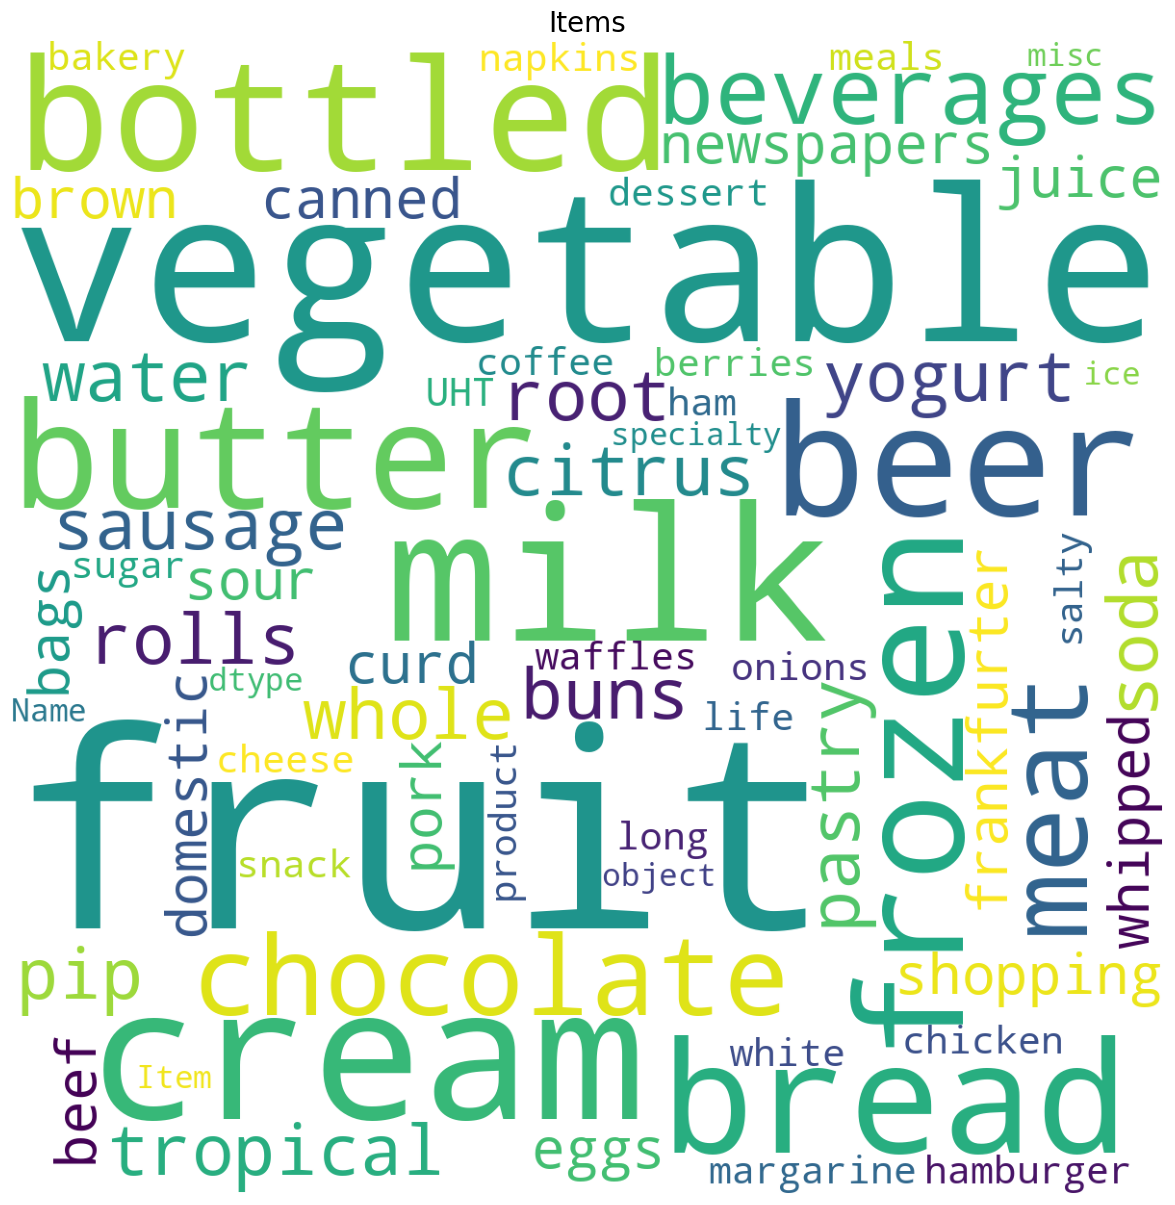

In [ ]:
#tạo và hiển thị một biểu đồ Word Cloud dựa trên danh sách các mặt hàng phổ biến từ DataFrame item
plt.rcParams['figure.figsize'] = (15, 15)
wordcloud = WordCloud(background_color = 'white', width = 1200,  height = 1200, max_words = 121).generate(str(item['Item']))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Items',fontsize = 20)
plt.show()

In [ ]:
#tạo và hiển thị biểu đồ Treemap dựa trên dữ liệu từ DataFrame item
fig = px.treemap(item, path=['Item'], values='Count')
fig.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Apriori là một thuật toán để khai thác tập mục thường xuyên và học quy tắc kết hợp trên cơ sở dữ liệu quan hệ. Nó tiến hành bằng cách xác định các mục riêng lẻ thường xuyên trong cơ sở dữ liệu và mở rộng chúng thành các tập mục ngày càng lớn hơn miễn là các tập mục đó xuất hiện đủ thường xuyên trong cơ sở dữ liệu. Các tập mục thường xuyên được Apriori xác định có thể được sử dụng để xác định các quy tắc kết hợp làm nổi bật các xu hướng chung trong cơ sở dữ liệu: điều này có ứng dụng trong các lĩnh vực như phân tích giỏ hàng thị trường.

Để xây dựng quy tắc kết hợp giữa các phần tử hoặc vật phẩm xem xét 3 yếu tố quan trọng là hỗ trợ, độ tin cậy và độ nâng

Độ hỗ trợ: Độ hỗ trợ của mục I được định nghĩa là tỷ lệ giữa số lượng giao dịch chứa mục I trên tổng số lượng giao dịch được biểu thị bằng:

Support(I)=Số giao dịch chứa I/Tổng số giao dịch

Độ tin cậy: Điều này được đo bằng tỷ lệ giao dịch có mục I1, trong đó mục I2 cũng xuất hiện. Độ tin cậy giữa hai mục I1 và I2 trong một giao dịch được định nghĩa bằng tổng số giao dịch chứa cả hai mục I1 và I2 chia cho tổng số giao dịch chứa I1.


Độ tin cậy(I1->I2)=Số lượng giao dịch chứa I1 và I2/(Tổng số giao dịch chứa I1)


Mức nâng: Mức nâng là tỷ số giữa độ tin cậy và mức hỗ trợ được biểu thị bằng:


Mức tăng(I1->I2)=Niềm tin(I1->I2)/Hỗ trợ(I2)




Sử dụng thuật toán Apriori để xác định danh sách mặt hàng phổ biến

In [ ]:
#phân tích hội tụ sử dụng thuật toán Apriori trên một ma trận dữ liệu giao dịch (transactions).
freq_items = apriori(transactions, min_support=0.001, use_colnames=True, verbose=1)
freq_items.head(7)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Processing 28 combinations | Sampling itemset size 4


,support,itemsets
0,0.004010,(Instant food products)
1,0.021386,(UHT-milk)
2,0.001470,(abrasive cleaner)
3,0.001938,(artif. sweetener)
4,0.008087,(baking powder)
5,0.001136,(bathroom cleaner)
6,0.033950,(beef)


In [ ]:
#tạo một cột mới có tên là 'length'
freq_items['length'] = freq_items['itemsets'].apply(lambda x: len(x))

In [ ]:
#In kết quả
freq_items.head(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,support,itemsets,length
0,0.004010,(Instant food products),1
1,0.021386,(UHT-milk),1
2,0.001470,(abrasive cleaner),1
3,0.001938,(artif. sweetener),1
4,0.008087,(baking powder),1
5,0.001136,(bathroom cleaner),1
6,0.033950,(beef),1
7,0.021787,(berries),1
8,0.016574,(beverages),1
9,0.045312,(bottled beer),1


In [ ]:
#hiển thị 10 hàng cuối cùng
freq_items.tail(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,support,itemsets,length
740,0.011161,"(whole milk, yogurt)",2
741,0.001136,"(other vegetables, rolls/buns, soda)",3
742,0.001203,"(other vegetables, whole milk, rolls/buns)",3
743,0.001136,"(whole milk, other vegetables, soda)",3
744,0.001136,"(whole milk, other vegetables, yogurt)",3
745,0.001136,"(whole milk, rolls/buns, sausage)",3
746,0.001002,"(whole milk, rolls/buns, soda)",3
747,0.001337,"(whole milk, rolls/buns, yogurt)",3
748,0.001069,"(whole milk, soda, sausage)",3
749,0.001470,"(whole milk, yogurt, sausage)",3


In [ ]:
#tạo ra các luật kết hợp từ các tập hợp mặt hàng phổ biến đã được xác định trước bằng thuật toán Apriori
rules = association_rules(freq_items, metric="confidence", min_threshold=0.001)
rules.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(bottled water),(UHT-milk),0.060683,0.021386,0.001069,0.017621,0.823954,-0.000228,0.996168,-0.185312
1,(UHT-milk),(bottled water),0.021386,0.060683,0.001069,0.050000,0.823954,-0.000228,0.988755,-0.179204
2,(other vegetables),(UHT-milk),0.122101,0.021386,0.002139,0.017515,0.818993,-0.000473,0.996060,-0.201119
3,(UHT-milk),(other vegetables),0.021386,0.122101,0.002139,0.100000,0.818993,-0.000473,0.975443,-0.184234
4,(rolls/buns),(UHT-milk),0.110005,0.021386,0.001804,0.016403,0.767013,-0.000548,0.994934,-0.254457


Trực quan hóa các kết quả tính

In [ ]:
#tạo và hiển thị biểu đồ phân tán giữa độ hỗ trợ và độ tin cậy của các luật kết hợp
fig=px.scatter(rules['support'], rules['confidence'])
fig.update_layout(
    xaxis_title="support",
    yaxis_title="confidence",

    font_family="Courier New",
    font_color="blue",
    title_font_family="Times New Roman",
    title_font_color="red",
    title=('Support vs Confidence')

)

fig.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
#tạo và hiển thị biểu đồ phân tán giữa độ hỗ trợ và lift của các luật kết hợp
fig=px.scatter(rules['support'], rules['lift'])
fig.update_layout(
    xaxis_title="support",
    yaxis_title="lift",

    font_family="Courier New",
    font_color="blue",
    title_font_family="Times New Roman",
    title_font_color="red",
    title=('Support vs Confidence')

)

fig.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Text(0.5, 1.0, 'lift vs Confidence')

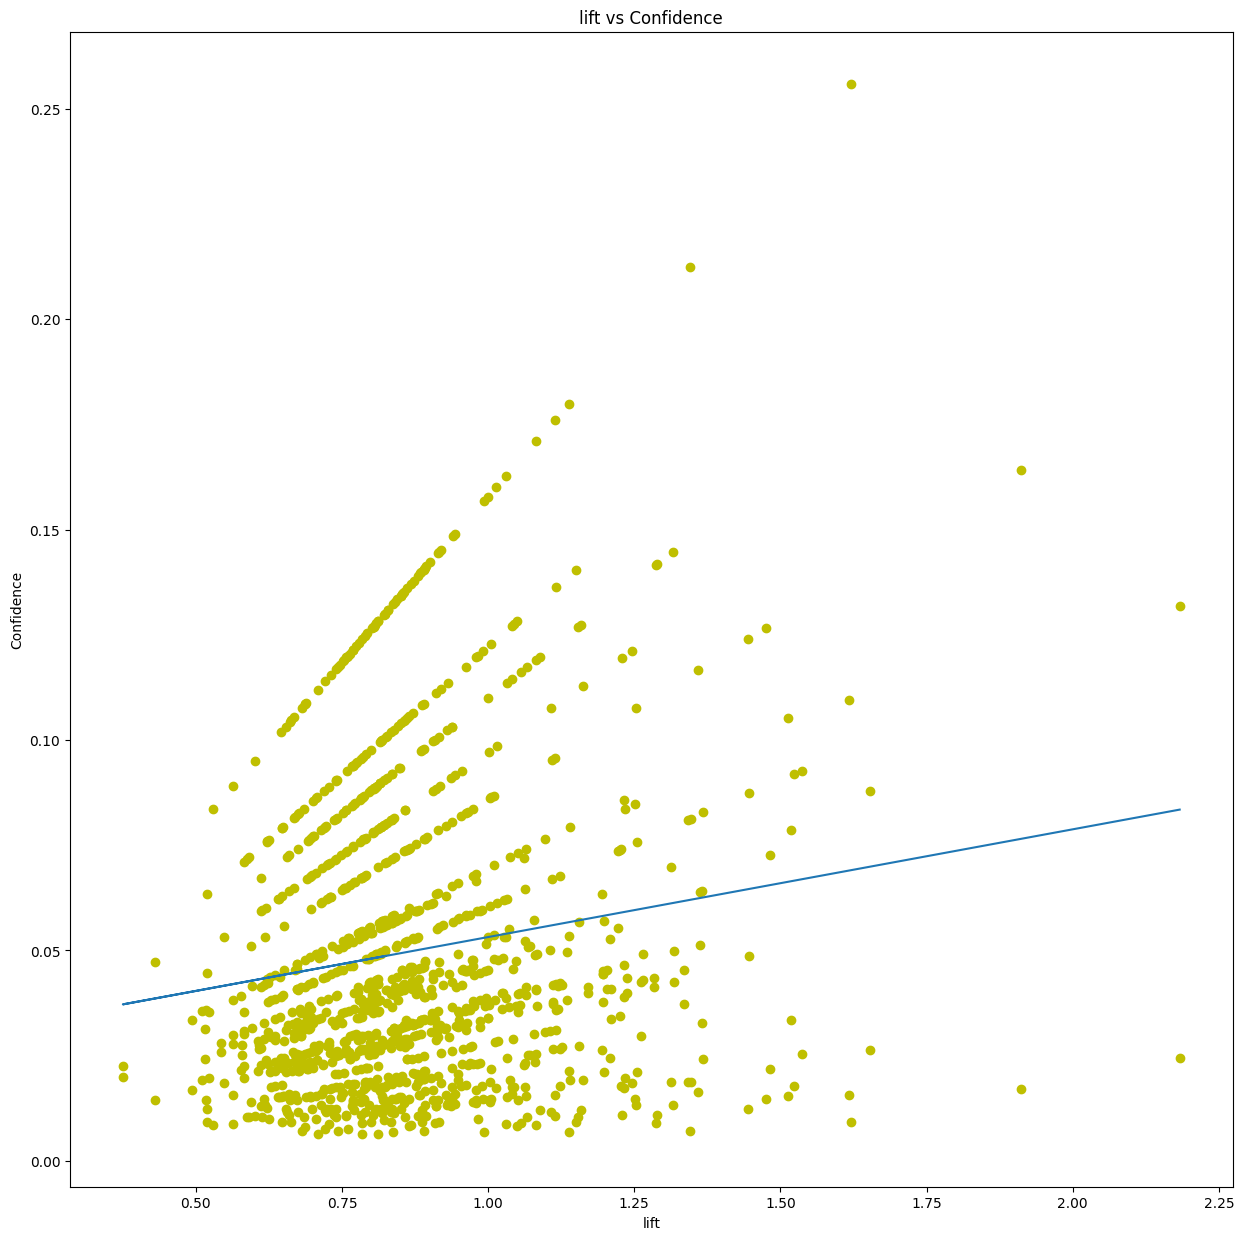

In [ ]:
#tạo và hiển thị biểu đồ phân tán của độ tin cậy và lift của các luật kết hợp
fit = np.polyfit(rules['lift'], rules['confidence'], 1)
fit_fn = np.poly1d(fit)
plt.plot(rules['lift'], rules['confidence'], 'yo', rules['lift'],
fit_fn(rules['lift']))
plt.xlabel('lift')
plt.ylabel('Confidence')
plt.title('lift vs Confidence')

In [ ]:
#Danh sách các mặt hàng phổ biến
#Thiết lập hiển thị
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
#Lấy ra cột 'itemsets' chứa các tập hợp mặt hàng phổ biến
frequent_itemsets = freq_items['itemsets']
print(frequent_itemsets)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



0                           (Instant food products)
1                                        (UHT-milk)
2                                (abrasive cleaner)
3                                (artif. sweetener)
4                                   (baking powder)
5                                (bathroom cleaner)
6                                            (beef)
7                                         (berries)
8                                       (beverages)
9                                    (bottled beer)
10                                  (bottled water)
11                                         (brandy)
12                                    (brown bread)
13                                         (butter)
14                                    (butter milk)
15                                       (cake bar)
16                                        (candles)
17                                          (candy)
18                                    (canned beer)
19          